In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Importing the Dataset and remove outlier

In [23]:
# Read the CSV file into a DataFrame
dataset = pd.read_csv("UTS_dataset/output_dataset.csv")
dataset.drop(['longevity_bin'], axis = 1, inplace =  True)
dataset.head()

,index,login,country,reg_date,Total_Trades,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_Open_Price,Average_Close_Price,Average_TP,Average_SL,Most_Common_Trading_Method,Average_Commission,Average_Swaps,Average_Profit,active,Trading_Method,longevity
0,1,524978,Austria,2023-06-07 05:58:36,1392,47.485632,1.230632,4.044965e+08,513.912144,513.898092,297.756577,168.537030,1,-6.429425,-1.366882,23.616724,False,Expert,142
1,2,524979,France,2023-06-07 06:17:30,2194,49.635369,0.013943,6.724644e+03,20467.746053,20466.447288,2818.566659,12916.827370,5,0.000000,-0.111285,-0.837867,False,Mobile,107
2,4,760487,Singapore,2023-01-04 08:48:24,69,15.942029,0.012609,2.783882e+03,11010.476377,11077.594638,10337.456522,168.292464,1,0.000000,0.002899,-13.648986,False,Expert,13
3,5,804664,Malaysia,2023-09-24 07:02:49,85,63.529412,0.018706,5.490400e+03,1265.465529,1266.228878,0.000000,0.000000,5,0.000000,-0.023176,-0.524588,False,Mobile,9
4,6,804687,Australia,2023-01-10 10:26:00,484,51.239669,0.019773,5.271755e+05,433.944222,431.902211,323.711256,431.677983,5,-0.151550,-0.015021,-0.319339,False,Mobile,372


In [24]:
# Retrieving the outlier
dataset_outlier = dataset[dataset['login'] == 88944670]
# Removing the outlier
dataset = dataset[dataset['login'] != 88944670]

Some correlation

<Figure size 1000x600 with 0 Axes>

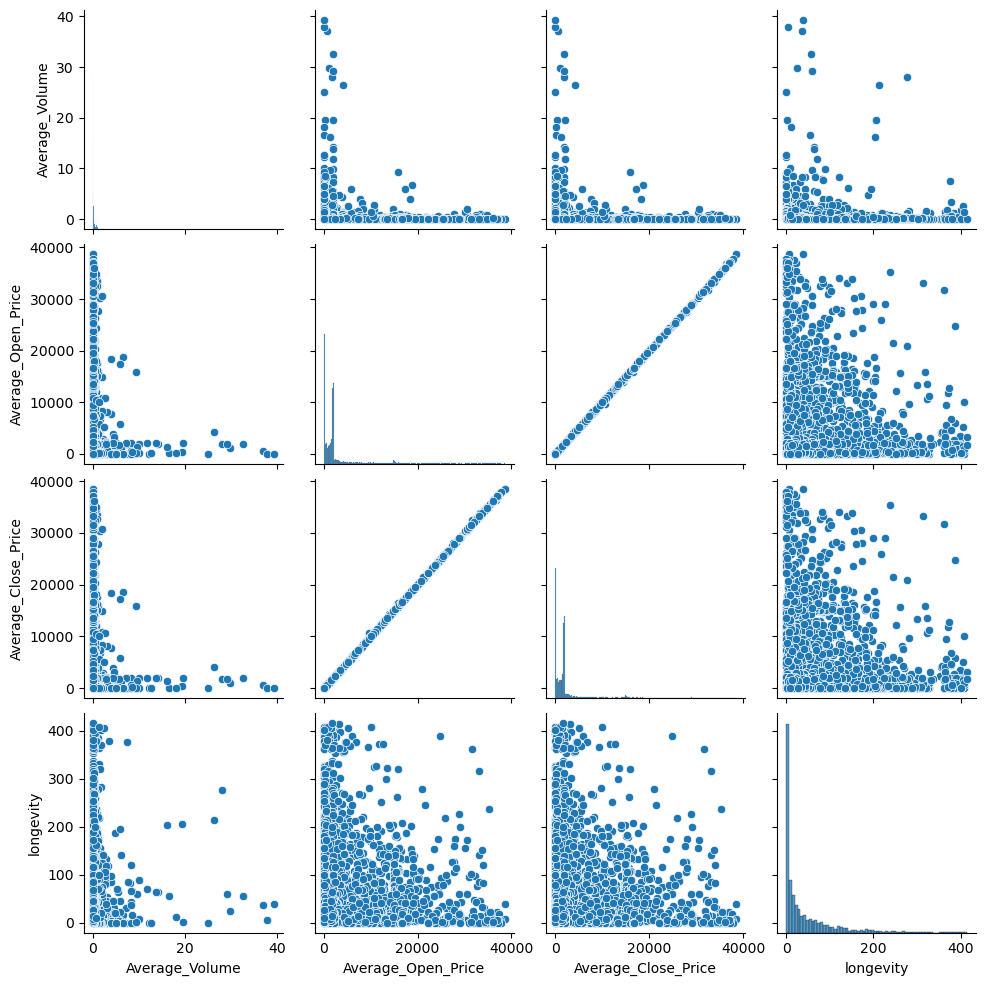

In [25]:
# Pairplot to visualize relationships between variables
sns.pairplot(dataset[['Average_Volume', 'Average_Open_Price', 'Average_Close_Price', 'longevity']])
plt.show()

# 2. Primiary Analysis

## 2.1 Longevity vs average volume

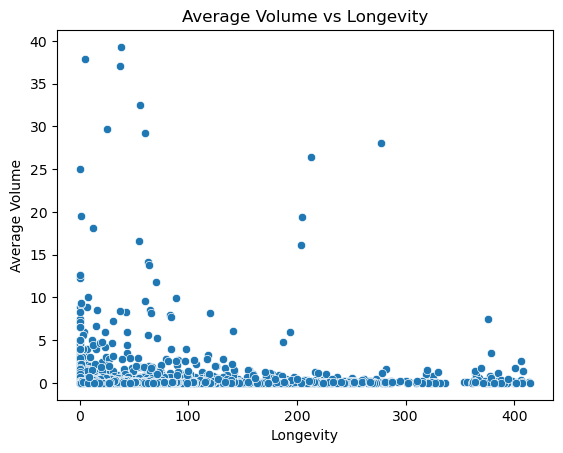

In [26]:
sns.scatterplot(x='longevity', y='Average_Volume', data=dataset)
plt.title('Average Volume vs Longevity')
plt.xlabel('Longevity')
plt.ylabel('Average Volume')
plt.show()


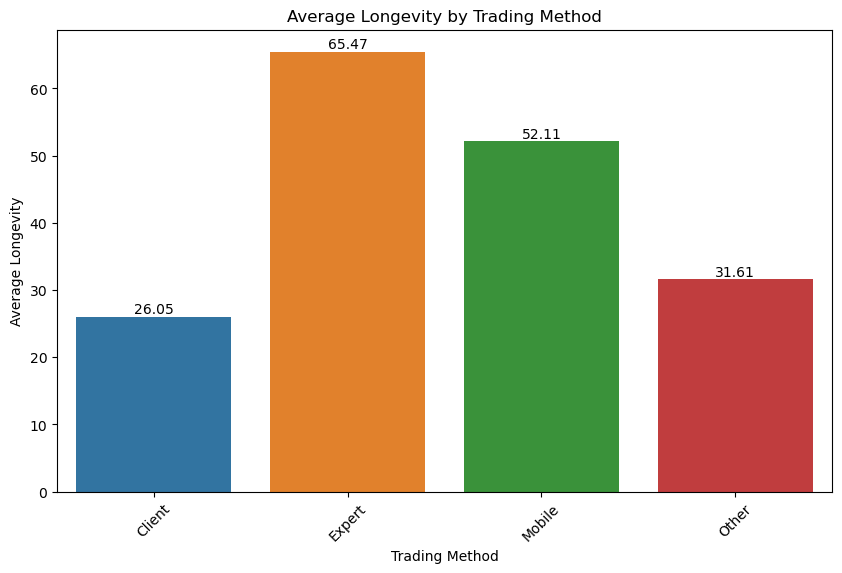

In [27]:
# Calculate average longevity for each trading method
average_longevity_by_method = dataset.groupby('Trading_Method')['longevity'].mean().reset_index()

# Rename columns
average_longevity_by_method = average_longevity_by_method.rename(columns={'Trading_Method': 'Trading Method', 'longevity': 'Average Longevity'})

# Plot average longevity by trading method
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Trading Method', y='Average Longevity', data=average_longevity_by_method)
plt.title('Average Longevity by Trading Method')
plt.xlabel('Trading Method')
plt.ylabel('Average Longevity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels on each column
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


## 2.2 Longevity vs average volume

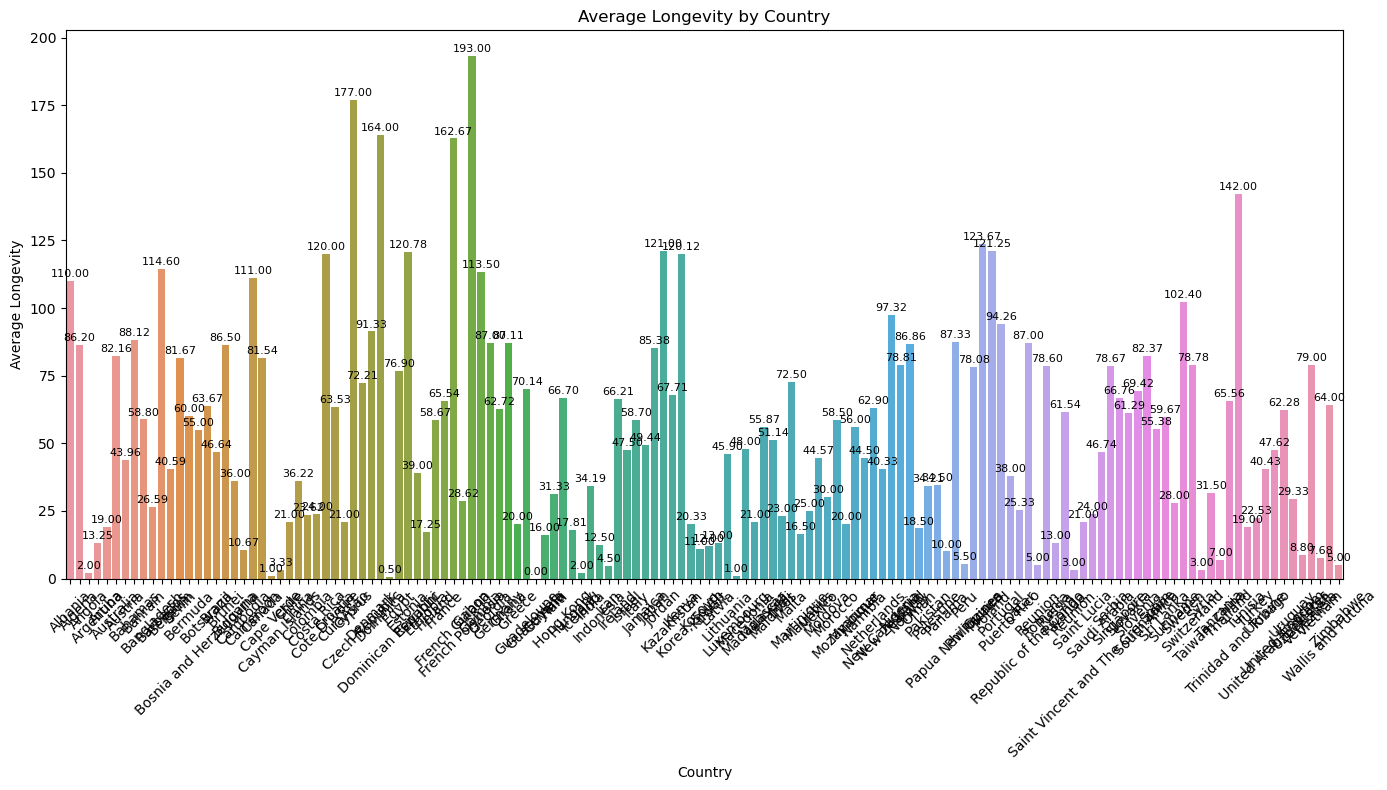

In [28]:
# Calculate average longevity for each country
average_longevity_by_country = dataset.groupby('country')['longevity'].mean().reset_index()

# Rename columns
average_longevity_by_country = average_longevity_by_country.rename(columns={'country': 'Country', 'longevity': 'Average Longevity'})

# Plot average longevity by country
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Country', y='Average Longevity', data=average_longevity_by_country)
plt.title('Average Longevity by Country')
plt.xlabel('Country')
plt.ylabel('Average Longevity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels on each column
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


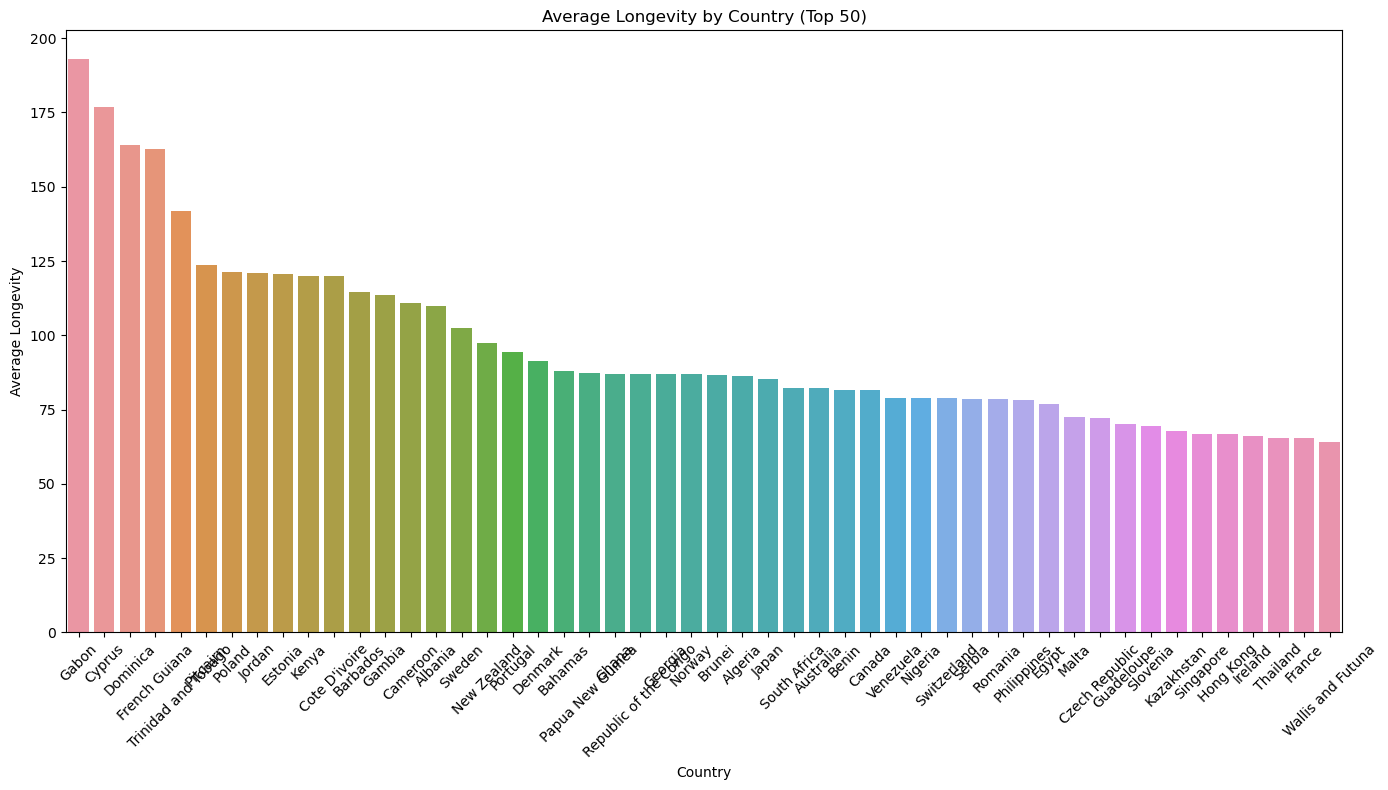

In [29]:
# Calculate average longevity for each country
average_longevity_by_country = dataset.groupby('country')['longevity'].mean().reset_index()

# Sort by longevity and select top 50 countries
top_50_countries = average_longevity_by_country.sort_values(by='longevity', ascending=False).head(50)

# Plot average longevity by country
plt.figure(figsize=(14, 8))
sns.barplot(x='country', y='longevity', data=top_50_countries)
plt.title('Average Longevity by Country (Top 50)')
plt.xlabel('Country')
plt.ylabel('Average Longevity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## 2.3 Longevity vs profit

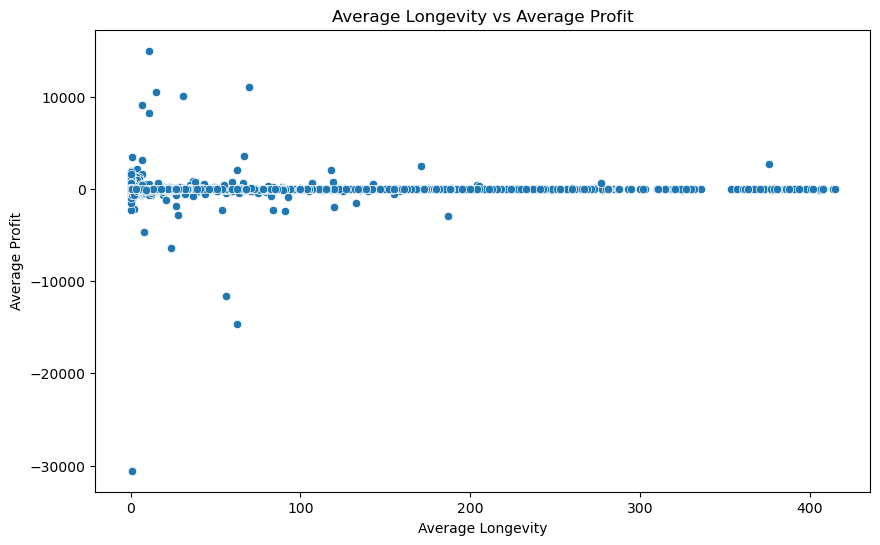

In [30]:
# Plot average longevity vs average profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Profit', data=dataset)
plt.title('Average Longevity vs Average Profit')
plt.xlabel('Average Longevity')
plt.ylabel('Average Profit')
plt.show()

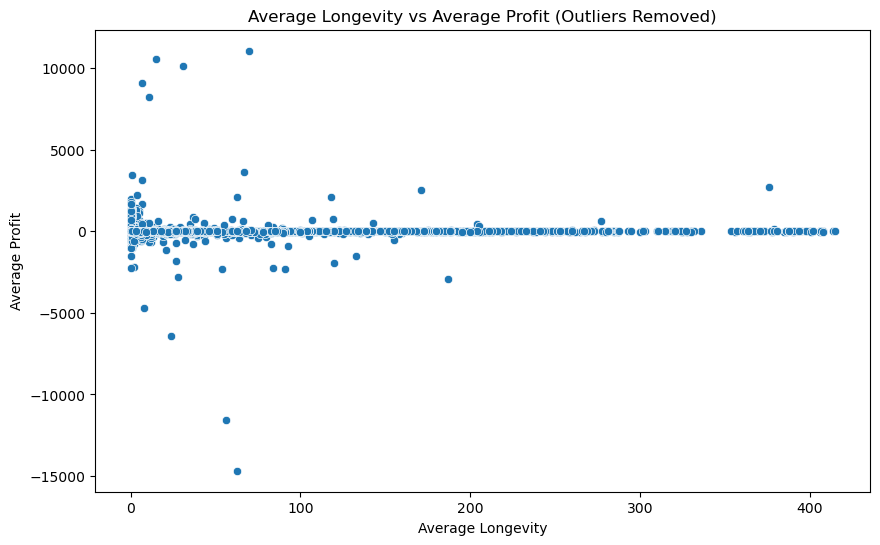

In [31]:
# Find the maximum and minimum profit values
max_profit = dataset['Average_Profit'].max()
min_profit = dataset['Average_Profit'].min()

# Filter the dataset to exclude rows with maximum and minimum profit values
filtered_dataset = dataset[(dataset['Average_Profit'] < max_profit) & (dataset['Average_Profit'] > min_profit)]

# Plot average longevity vs average profit for the filtered dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Profit', data=filtered_dataset)
plt.title('Average Longevity vs Average Profit (Outliers Removed)')
plt.xlabel('Average Longevity')
plt.ylabel('Average Profit')
plt.show()

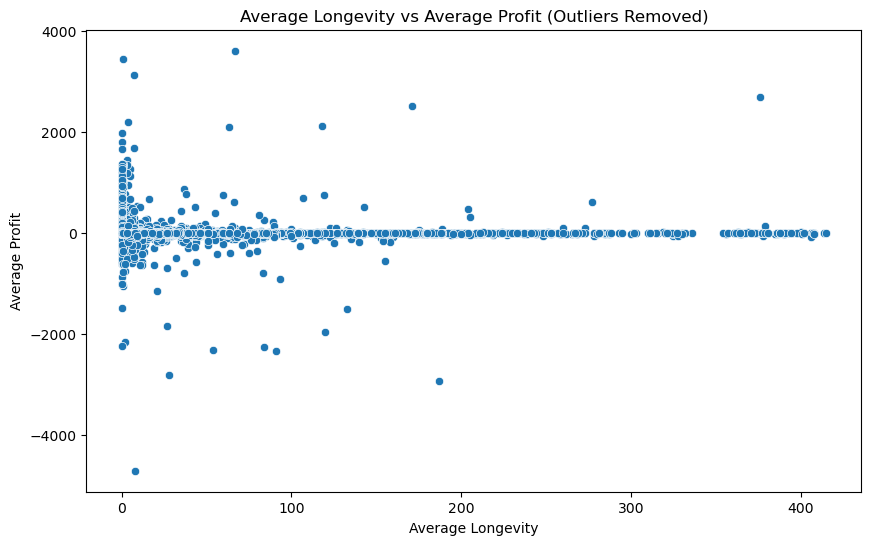

In [32]:
# Filter the dataset to exclude rows with profit above 5000 or below -5000
fivek_filtered_dataset = dataset[(dataset['Average_Profit'] <= 5000) & (dataset['Average_Profit'] >= -5000)]

# Plot average longevity vs average profit for the filtered dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Profit', data=fivek_filtered_dataset)
plt.title('Average Longevity vs Average Profit (Outliers Removed)')
plt.xlabel('Average Longevity')
plt.ylabel('Average Profit')
plt.show()

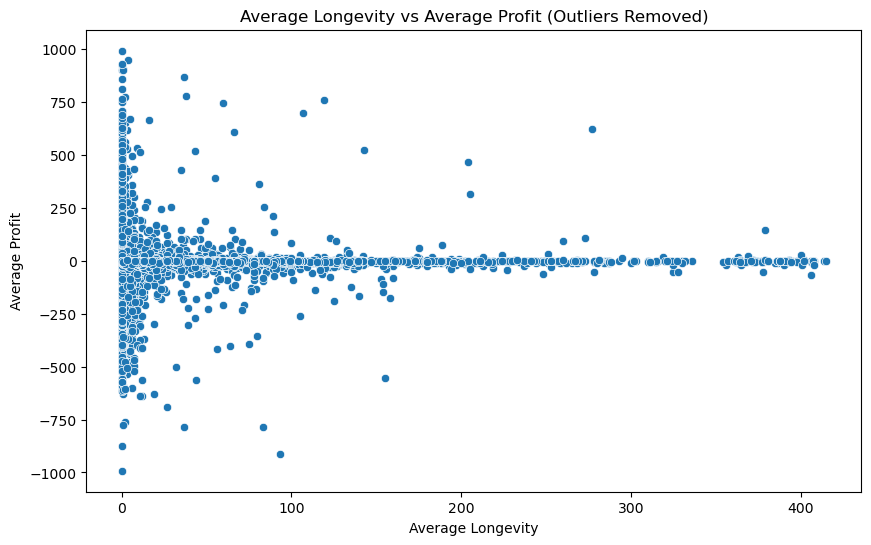

In [33]:
# Filter the dataset to exclude rows with profit above 1000 or below -1000
filtered_dataset = dataset[(dataset['Average_Profit'] <= 1000) & (dataset['Average_Profit'] >= -1000)]

# Plot average longevity vs average profit for the filtered dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Profit', data=filtered_dataset)
plt.title('Average Longevity vs Average Profit (Outliers Removed)')
plt.xlabel('Average Longevity')
plt.ylabel('Average Profit')
plt.show()

## 2.4 Longevity vs average volume in USD

In [35]:
# # Plot average longevity vs Average_Column_USD
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='longevity', y='Average_Volume_USD', data=dataset)
# plt.title('Average Longevity vs Average Column USD')
# plt.xlabel('Average Longevity')
# plt.ylabel('Average Column USD')
# plt.show()

## 2.5 Longevity vs average commission

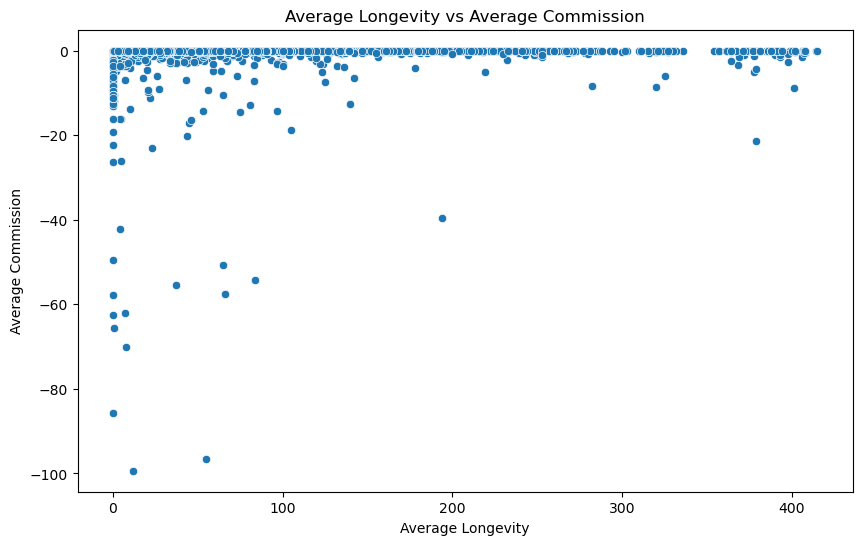

In [37]:
# Plot average commission vs average longevity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Commission', data=dataset)
plt.title('Average Longevity vs Average Commission')
plt.xlabel('Average Longevity')
plt.ylabel('Average Commission')
plt.show()


## 2.6 Longevity vs average swap

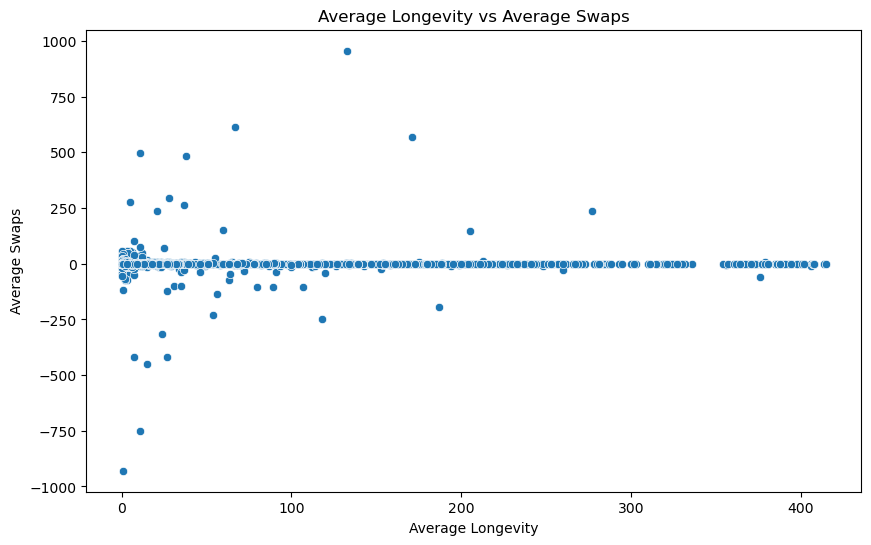

In [38]:
# Plot average swaps vs average longevity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Swaps', data=dataset)
plt.title('Average Longevity vs Average Swaps')
plt.xlabel('Average Longevity')
plt.ylabel('Average Swaps')
plt.show()

# 3 Combine multiple var

## 3. Longevity vs 


Grouped Data:
   Average_Volume  Average_Profit  longevity
0           0.005       -0.025000        0.0
1           0.010       -3.617931       80.0
2           0.010       -2.318966       41.0
3           0.010       -0.119372        8.0
4           0.010       -0.033276       34.0


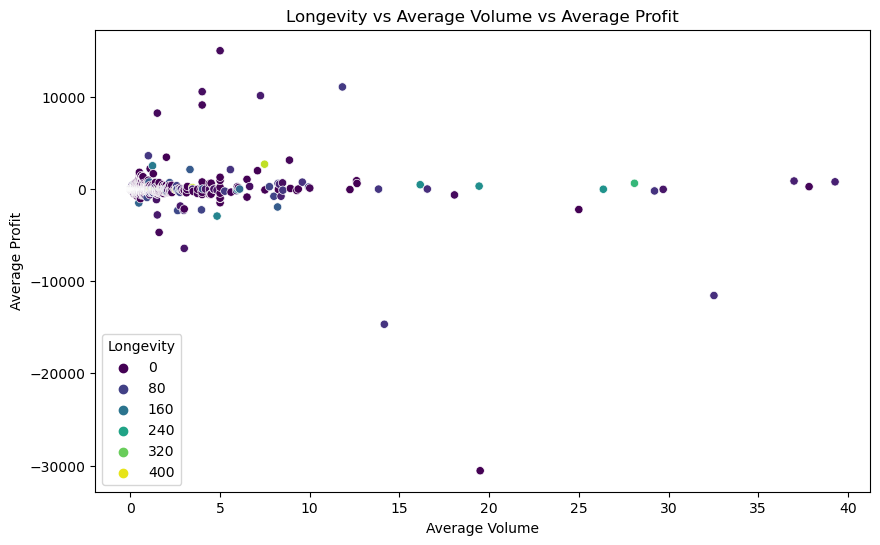

In [57]:
# Group by combinations of two variables and calculate descriptive statistics
grouped_data = dataset.groupby(['Average_Volume', 'Average_Profit'])['longevity'].mean().reset_index()

# Print the first few rows of the grouped data
print("Grouped Data:")
print(grouped_data.head())

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Volume', y='Average_Profit', hue='longevity', data=grouped_data, palette='viridis')
plt.title('Longevity vs Average Volume vs Average Profit')
plt.xlabel('Average Volume')
plt.ylabel('Average Profit')
plt.legend(title='Longevity')
plt.show()

In [ ]:
# pivot_table = dataset.pivot_table(index='Average_Volume', columns='Average_Profit', values='longevity', aggfunc='mean')

# # Plot heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
# plt.title('Longevity vs Average Volume vs Average Profit')
# plt.xlabel('Average Profit')
# plt.ylabel('Average Volume')
# plt.show()


## 3. Longevity vs

## 3. Longevity vs

## 3. Longevity vs

# 4 One year old trader

## 4.1 General EDA on 365

In [47]:
# Filter records where longevity is greater than 365 days
long_survivors = dataset[dataset['longevity'] > 365]

# Print the records of people who survived more than 365 days
print("People who survived more than 365 days:")
print(long_survivors)

People who survived more than 365 days:
      index     login         country             reg_date  Total_Trades  \
4         6    804687       Australia  2023-01-10 10:26:00           484   
33       37    804867  United Kingdom  2023-01-16 13:41:20           553   
37       41    804893          France  2023-01-16 21:31:03          6094   
41       45    804936          France  2023-01-17 12:35:23          1591   
49       53    804954        Portugal  2023-01-17 22:52:37           470   
51       55    804972       Singapore  2023-01-18 04:19:26          1438   
60       64    805070         Nigeria  2023-01-19 13:51:00           173   
62       66    805093     Switzerland  2023-01-19 18:41:51           353   
68       72    805135     New Zealand  2023-01-20 18:18:24           666   
70       76    805165          France  2023-01-21 11:32:34          7260   
72       80    805187          France  2023-01-22 02:39:56            53   
87       95    805260     Philippines  2023-01-2

In [48]:
# Analyze commonalities among the long survivors
common_countries = long_survivors['country'].value_counts()
common_trading_methods = long_survivors['Trading_Method'].value_counts()
average_profit_stats = long_survivors['Average_Profit'].describe()
average_volume_stats = long_survivors['Average_Volume'].describe()

In [49]:
# Print commonalities
print("\nCommon Countries:")
print(common_countries)
print("\nCommon Trading Methods:")
print(common_trading_methods)
print("\nAverage Profit Statistics:")
print(average_profit_stats)
print("\nAverage Volume Statistics:")
print(average_volume_stats)


Common Countries:
France            9
Canada            7
New Zealand       6
United Kingdom    4
Australia         3
Philippines       3
Nigeria           3
Singapore         3
Switzerland       2
Portugal          2
Poland            2
South Africa      2
Sweden            2
Spain             1
Slovenia          1
Saudi Arabia      1
Ireland           1
Morocco           1
Cyprus            1
Kenya             1
Barbados          1
Hong Kong         1
Romania           1
Name: country, dtype: int64

Common Trading Methods:
Mobile    23
Expert    19
Client    15
Other      1
Name: Trading_Method, dtype: int64

Average Profit Statistics:
count      58.000000
mean       45.690719
std       354.685183
min       -67.612328
25%        -3.318950
50%        -0.842640
75%         0.232981
max      2694.472000
Name: Average_Profit, dtype: float64

Average Volume Statistics:
count    58.000000
mean      0.467157
std       1.139637
min       0.010685
25%       0.025623
50%       0.083813
75%   

In [51]:
print("\nCommon Trading Methods:")
print(common_trading_methods)


Common Trading Methods:
Mobile    23
Expert    19
Client    15
Other      1
Name: Trading_Method, dtype: int64


In [54]:
print("\nAverage Profit Statistics:")
print(average_profit_stats)


Average Profit Statistics:
count      58.000000
mean       45.690719
std       354.685183
min       -67.612328
25%        -3.318950
50%        -0.842640
75%         0.232981
max      2694.472000
Name: Average_Profit, dtype: float64


In [55]:
print("\nAverage Volume Statistics:")
print(average_volume_stats)


Average Volume Statistics:
count    58.000000
mean      0.467157
std       1.139637
min       0.010685
25%       0.025623
50%       0.083813
75%       0.329677
max       7.479000
Name: Average_Volume, dtype: float64
